# SHOAIB FAROOQ
## *21-2278*

## Important Installation for Google Colab

In [1]:
#For Access Kaggle 
!pip install -q kaggle

In [2]:
#For Install Kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shoaibfarooq","key":"fdee8716a39352976732f3597bd732be"}'}

In [3]:
# Make Directory
! mkdir ~/.kaggle
# Access Json File
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## Download Datasets

In [4]:
#60,000+ Images of Cars
!kaggle datasets download -d prondeau/the-car-connection-picture-dataset
# Folder for Save 60,000+ Images of Cars Dataset
! mkdir ~/.carDataset
# For unzip and Save in Folder
!unzip "/content/the-car-connection-picture-dataset.zip" -d "/content/carDataset"

# 6899 Natural Images Dataset
!kaggle datasets download -d prasunroy/natural-images
# Folder for Save Natural Images Dataset
! mkdir ~/.Natural-Images
# For unzip and Save in Folder
!unzip "/content/natural-images.zip" -d "/content/Natural-Images"

# KTTI Images Dataset
!kaggle datasets download -d klemenko/kitti-dataset
# Folder for Save KTTII Images Dataset
! mkdir ~/.Kitti-Images
# For unzip and Save in Folder
!unzip "/content/kitti-dataset.zip" -d "/content/Kitti-Images"

#TT100 Images Dataset
!kaggle datasets download -d braunge/tt100k
# Folder for Save TT100 Images Dataset
! mkdir ~/.TT100-Images
# For unzip and Save in Folder
!unzip "/content/tt100k.zip" -d "/content/TT100-Images"





Streaming output truncated to the last 5000 lines.
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62018.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62019.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62025.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/6203.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62043.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62052.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62071.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62077.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62082.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62093.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62094.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/62100.txt  
  inflating: /content/TT100-Images/mydata/mydata/labels/train/

## For Libraries

In [5]:
# For defien Pathes and read images from folders
from glob import glob
#  For enabled Python to deal with images
import PIL
# For enable computer vision features
import cv2
#for draw chats and graphs and image representation
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
#Histogram of oriented gradients (HOG) Python implementation 
from skimage.feature import hog
#for work with numpy arrays
import numpy as np
#for work with dataframs
import pandas as pd
#for representation of different data behaviours
import seaborn as sns
# For Define using operating system
import os
# For define Time
import time
#For Define Randomness
import random
#For SVM 
from sklearn.svm import SVC
#For DecisionTree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#for neural_network
from sklearn.neural_network import MLPClassifier
#for generate report related to model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#spliting into train and test sets
from sklearn.model_selection import train_test_split
#finding the optimal parameter values from a given set of parameters in a grid
from sklearn.model_selection import GridSearchCV
# for  primarily used in serializing and deserializing a Python object structure
import pickle

## Read Imaga Datasets

In [95]:
# Convort into poistve and negative distributaion of images
car_paths = glob("/content/carDataset"+"/*")[:6000]
#car_paths = glob("/content/TT100-Images/mydata/mydata/images/train"+"/*")[:5600]
#car_paths = glob("/content/Kitti-Images/data_object_image_2/training/image_2"+"/*")[:6000]
neg_paths = []
for class_path in glob("/content/Natural-Images/data/natural_images"+"/*"):
    if class_path != "/content/Natural-Images/data/natural_images/car":
        paths = random.choices(glob(class_path+"/*"),k=800)
        neg_paths = paths + neg_paths
print("There are {} car images in the dataset".format(len(car_paths)))
print("There are {} negative images in the dataset".format(len(neg_paths)))

There are 6000 car images in the dataset
There are 5600 negative images in the dataset


## For Image Show

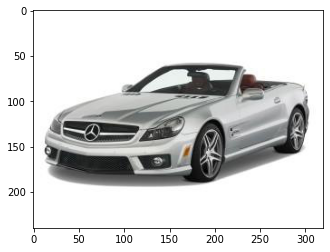

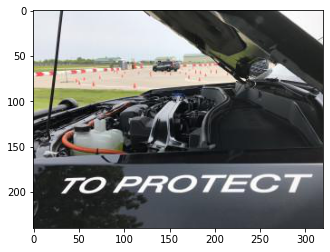

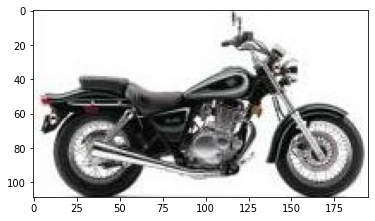

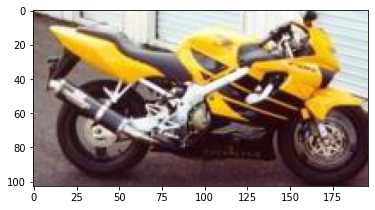

In [96]:
def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

for file in car_paths[:2]:
    process(file)
for file in neg_paths[1800:1802]:
    process(file)

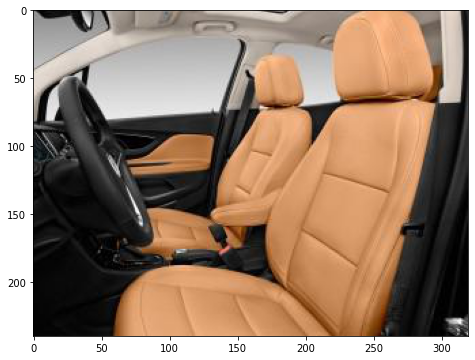

In [97]:
example_image = np.asarray(PIL.Image.open(car_paths[500]))
fig = plt.figure(figsize=(12,6))
plt.imshow(example_image)

In [98]:
example_image.shape

(240, 320, 3)

## Generate HOG ofabove Image

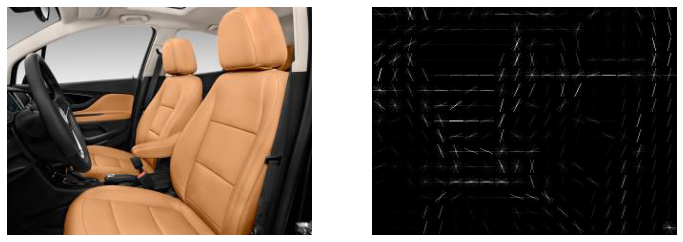

In [99]:


hog_features, visualized = hog(image=example_image,
                              orientations=9,
                              pixels_per_cell=(16,16),
                              cells_per_block=(2,2),
                              visualize=True,
                              multichannel=True)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(example_image)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(visualized,cmap="gray")
plt.axis("off")
plt.show()

In [100]:
hog_features.shape

(9576,)

## Generate HOG of Negative and Positive Images

In [101]:
pos_images = []
neg_images = []
pos_labels = np.ones(len(car_paths))
neg_labels = np.zeros(len(neg_paths))
start = time.time()
for car_path in car_paths:    
    img = np.asarray(PIL.Image.open(car_path))
    img = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    img = hog(img,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2))
    pos_images.append(img)

for neg_path in neg_paths:
    img = np.asarray(PIL.Image.open(neg_path))
    img = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    img = hog(img,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2))
    neg_images.append(img)
# + and - images HOG Act as X 
x = np.asarray(pos_images + neg_images)
# list of + and - images HOG Act as Y
y = np.asarray(list(pos_labels) + list(neg_labels))
# For find time for process of HOG
processTime = round(time.time()-start,2)
print("Reading images and extracting features has taken {} seconds".format(processTime))
# For presentation of shaps
print("Shape of image set",x.shape)
print("Shape of labels",y.shape)

Reading images and extracting features has taken 46.58 seconds
Shape of image set (11600, 540)
Shape of labels (11600,)


## For Slides Extraction

In [102]:
def slideExtract(image,windowSize=(96,64),channel="RGB",step=12):
    
    # Converting to grayscale
    if channel == "RGB":
        img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    elif channel == "BGR":
        img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    elif channel.lower()!="grayscale" or channel.lower()!="gray":
        raise Exception("Invalid channel type")
    
    # We'll store coords and features in these lists
    coords = []
    features = []
    
    hIm,wIm = image.shape[:2] 

    
    # W1 will start from 0 to end of image - window size
    # W2 will start from window size to end of image
    # We'll use step (stride) like convolution kernels.
    for w1,w2 in zip(range(0,wIm-windowSize[0],step),range(windowSize[0],wIm,step)):
       
        for h1,h2 in zip(range(0,hIm-windowSize[1],step),range(windowSize[1],hIm,step)):
            window = img[h1:h2,w1:w2]
            features_of_window = hog(window,orientations=9,pixels_per_cell=(16,16),
                                     cells_per_block=(2,2)
                                    )
            
            coords.append((w1,w2,h1,h2))
            features.append(features_of_window)
    
    return (coords,np.asarray(features))
from sklearn.preprocessing import MinMaxScaler

class Heatmap():
    def __init__(self,original_image):
        
        # Mask attribute is the heatmap initialized with zeros
        self.mask = np.zeros(original_image.shape[:2])
    
    # Increase value of region function will add some heat to heatmap
    def incValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] + 30
    
    # Decrease value of region function will remove some heat from heatmap
    # We'll use this function if a region considered negative
    def decValOfReg(self,coords):
        w1,w2,h1,h2 = coords
        self.mask[h1:h2,w1:w2] = self.mask[h1:h2,w1:w2] - 30
    
    def compileHeatmap(self):
        
        # As you know,pixel values must be between 0 and 255 (uint8)
        # Now we'll scale our values between 0 and 255 and convert it to uint8
        
        # Scaling between 0 and 1 
        scaler = MinMaxScaler()
        
        self.mask = scaler.fit_transform(self.mask)
        
        
        # Scaling between 0 and 255
        self.mask = np.asarray(self.mask * 255).astype(np.uint8)
        
        # Now we'll threshold our mask, if a value is higher than 170, it will be white else
        # it will be black
        self.mask = cv2.inRange(self.mask,170,255)
        
        return self.mask

## Spliting Into Test and Train Data

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9280, 540)
(2320, 540)
(9280,)
(2320,)


## For SVM Training

[LibSVM]SVM Treaning  has taken 10.53 seconds
Accuracy score of model is  97.07
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1090
         1.0       0.99      0.96      0.97      1230

    accuracy                           0.97      2320
   macro avg       0.97      0.97      0.97      2320
weighted avg       0.97      0.97      0.97      2320



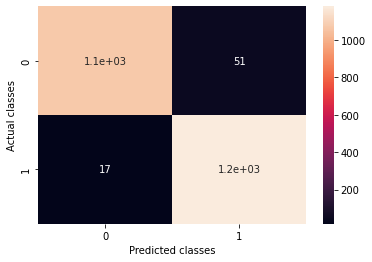

In [104]:
# Creating a SVC object
start = time.time()
svc = SVC(kernel = 'rbf', verbose=True, random_state=42)
# Fit the training dataset
svc.fit(x_train,y_train)
processTime = round(time.time()-start,2)
print("SVM Treaning  has taken {} seconds".format(processTime))
svm_pred = svc.predict(x_test)
print("Accuracy score of model is ",round(accuracy_score(y_pred=svm_pred,y_true=y_test)*100, 2))
cm=confusion_matrix(svm_pred,y_test)
sns.heatmap(cm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(classification_report(y_test, svm_pred))

## For SVM Testing

True label:  Not car
Prediction: Not car


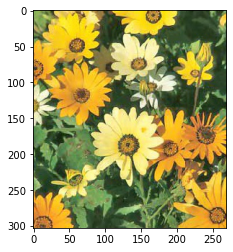

In [105]:
# testing
def test_prediction(img_path, true_label, svc):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2), visualize=True)
    x_tst = np.asarray(image)
    pred = svc.predict([x_tst])
    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")
    elif pred[0] == 1.0:
        print("Prediction: Car")
test_prediction(neg_paths[55], "Not car", svc)

True label:  Car
Prediction: Car


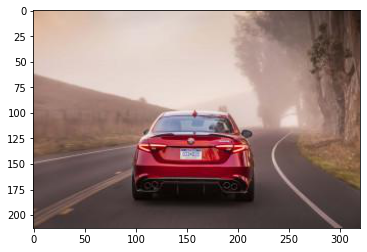

In [106]:
test_prediction(car_paths[25], "Car", svc)

True label:  Car
Prediction: Car


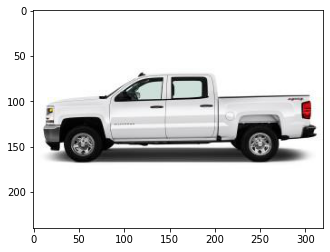

In [107]:
test_prediction(car_paths[100], "Car", svc)

True label:  Not car
Prediction: Not car


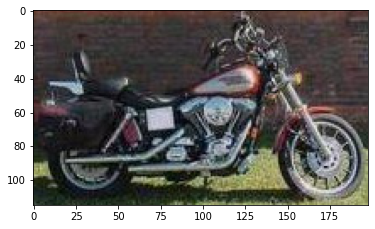

In [108]:
test_prediction(neg_paths[1900], "Not car", svc)


## SVM BSED OBJECT DETECTION

In [109]:
def svm_detect(image):
    
    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)
    
    
    for i in range(len(features)):
        # If region is positive then add some heat
        decision = svc.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])
    
    # Compiling heatmap
    mask = htmp.compileHeatmap()
    
    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 75*75:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)
    
    return image


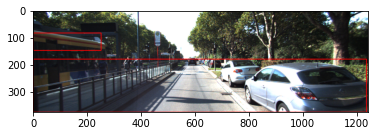

In [110]:
detected = svm_detect(np.asarray(PIL.Image.open("/content/Kitti-Images/data_object_image_3/testing/image_3/000050.png")))
plt.imshow(detected)

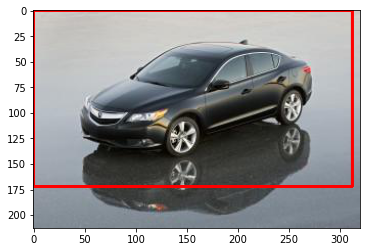

In [111]:
detected = svm_detect(np.asarray(PIL.Image.open("/content/carDataset/Acura_ILX_2015_27_17_150_20_4_70_55_179_24_FWD_5_4_4dr_Dwn.jpg")))
plt.imshow(detected)

## FOR KNN Traning

Accuracy score of model is  93.88
SVM Treaning  has taken 1.26 seconds
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1090
         1.0       0.99      0.89      0.94      1230

    accuracy                           0.94      2320
   macro avg       0.94      0.94      0.94      2320
weighted avg       0.94      0.94      0.94      2320



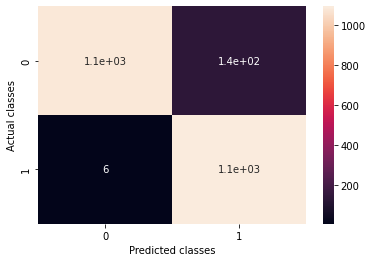

In [112]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 7)
# Fit the training dataset
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
print("Accuracy score of model is ",round(accuracy_score(y_pred=knn_pred,y_true=y_test)*100, 2))
processTime = round(time.time()-start,2)
print("SVM Treaning  has taken {} seconds".format(processTime))
cm=confusion_matrix(knn_pred,y_test)
sns.heatmap(cm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(classification_report(y_test, knn_pred))

## For KNN Testing

True label:  Not car
Prediction: Not car


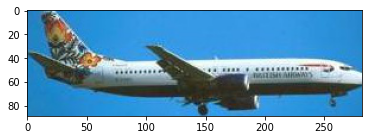

In [113]:
# testing
def test_prediction(img_path, true_label, svc):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2), visualize=True)
    x_tst = np.asarray(image)
    pred = knn.predict([x_tst])
    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")
    elif pred[0] == 1.0:
        print("Prediction: Car")
test_prediction(neg_paths[2500], "Not car", knn)

True label:  Not car
Prediction: Not car


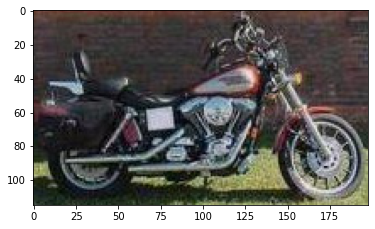

In [114]:
test_prediction(neg_paths[1900], "Not car", knn)

True label:  Car
Prediction: Car


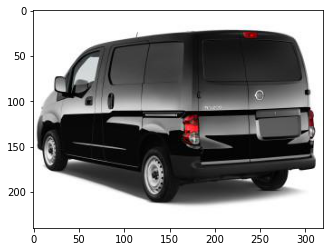

In [115]:
test_prediction(car_paths[800], "Car", knn)

## KNN BSED OBJECT DETECTION

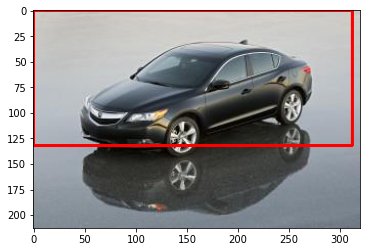

In [116]:
def knn_detect(image):
    
    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)
    
    
    for i in range(len(features)):
        # If region is positive then add some heat
        decision = knn.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])
    
    # Compiling heatmap
    mask = htmp.compileHeatmap()
    
    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 70*70:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)
    
    return image
detected = knn_detect(np.asarray(PIL.Image.open("/content/carDataset/Acura_ILX_2015_27_17_150_20_4_70_55_179_24_FWD_5_4_4dr_Dwn.jpg")))
plt.imshow(detected)

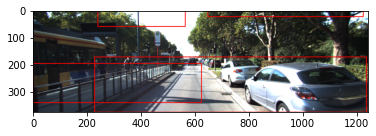

In [117]:
# detected = knn_detect(np.asarray(PIL.Image.open("/content/TT100-Images/mydata/mydata/images/val/10175.jpg")))
# plt.imshow(detected)
detected = knn_detect(np.asarray(PIL.Image.open("/content/Kitti-Images/data_object_image_3/testing/image_3/000050.png")))
plt.imshow(detected)

## FOR Decision Tree Traning 

Accuracy score of model is  89.4
Decision Tree Treaning  has taken 11.25 seconds
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1090
         1.0       0.91      0.88      0.90      1230

    accuracy                           0.89      2320
   macro avg       0.89      0.89      0.89      2320
weighted avg       0.89      0.89      0.89      2320



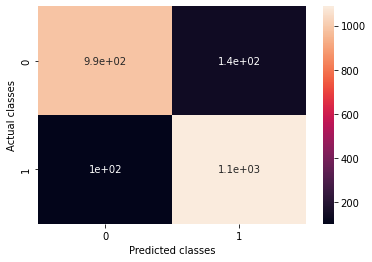

In [118]:
start = time.time()
dtree = DecisionTreeClassifier(max_depth = 30)
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
print("Accuracy score of model is ",round(accuracy_score(y_pred=dtree_pred,y_true=y_test)*100, 2))
processTime = round(time.time()-start,2)
print("Decision Tree Treaning  has taken {} seconds".format(processTime))
cm=confusion_matrix(dtree_pred,y_test)
sns.heatmap(cm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(classification_report(y_test, dtree_pred))

## For Decision Tree Testing

True label:  Not car
Prediction: Not car


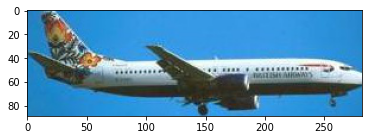

In [119]:
# testing
def test_prediction(img_path, true_label, dtree):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2), visualize=True)
    x_tst = np.asarray(image)
    pred = dtree.predict([x_tst])
    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")
    elif pred[0] == 1.0:
        print("Prediction: Car")
test_prediction(neg_paths[2500], "Not car", dtree)

True label:  Car
Prediction: Car


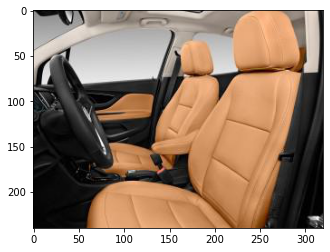

In [120]:
test_prediction(car_paths[500], "Car", dtree)

## Decision Tree BSED OBJECT DETECTION

In [121]:
def dt_detect(image):
    
    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)
    
    
    for i in range(len(features)):
        # If region is positive then add some heat
        decision = dtree.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])
    
    # Compiling heatmap
    mask = htmp.compileHeatmap()
    
    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 50*50:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)
    
    return image


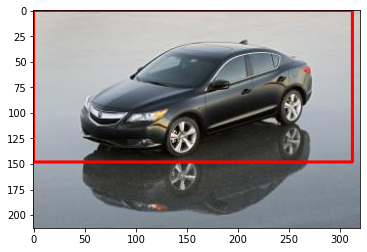

In [122]:

detected = dt_detect(np.asarray(PIL.Image.open("/content/carDataset/Acura_ILX_2015_27_17_150_20_4_70_55_179_24_FWD_5_4_4dr_Dwn.jpg")))
plt.imshow(detected)

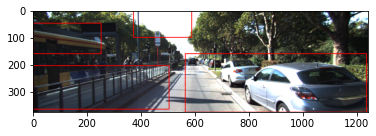

In [123]:
# detected = dt_detect(np.asarray(PIL.Image.open("/content/TT100-Images/mydata/mydata/images/val/10175.jpg")))
# plt.imshow(detected)
detected = dt_detect(np.asarray(PIL.Image.open("/content/Kitti-Images/data_object_image_3/testing/image_3/000050.png")))
plt.imshow(detected)

## FOR Neural Network (Multi Layer Perceptron) Traning

Accuracy score of model is  96.81
Neural Network (Multi Layer Perceptron) Treaning  has taken 60.34 seconds
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1090
         1.0       0.98      0.96      0.97      1230

    accuracy                           0.97      2320
   macro avg       0.97      0.97      0.97      2320
weighted avg       0.97      0.97      0.97      2320



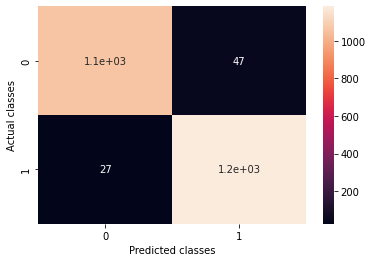

In [124]:
nn = MLPClassifier(random_state=1, max_iter=300, learning_rate='adaptive')
nn.fit(x_train, y_train)
nn_pred = nn.predict(x_test)
print("Accuracy score of model is ",round(accuracy_score(y_pred=nn_pred,y_true=y_test)*100, 2))
processTime = round(time.time()-start,2)
print("Neural Network (Multi Layer Perceptron) Treaning  has taken {} seconds".format(processTime))
cm=confusion_matrix(nn_pred,y_test)
sns.heatmap(cm, annot=True)
#x y labeling
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(classification_report(y_test, nn_pred))

## FOR Neural Network (Multi Layer Perceptron) Testing

True label:  Not car
Prediction: Not car


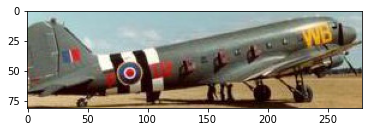

In [125]:
# testing
def test_prediction(img_path, true_label, svc):
    img = np.asarray(PIL.Image.open(img_path))
    img_gray = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
    image, viz = hog(img_gray,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2), visualize=True)
    x_tst = np.asarray(image)
    pred = nn.predict([x_tst])
    print("True label: ", true_label)
    plt.imshow(img)
    if pred[0] == 0.0:
        print("Prediction: Not car")
    elif pred[0] == 1.0:
        print("Prediction: Car")
test_prediction(neg_paths[2550], "Not car", nn)

True label:  Car
Prediction: Car


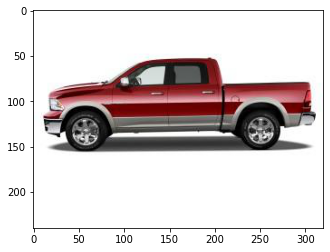

In [126]:
test_prediction(car_paths[2300], "Car", nn)

Neural Network (Multi Layer Perceptron) BSED OBJECT DETECTION

In [127]:
def nn_detect(image):
    
    # Extracting features and initalizing heatmap
    coords,features = slideExtract(image)
    htmp = Heatmap(image)
    
    
    for i in range(len(features)):
        # If region is positive then add some heat
        decision = nn.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])
    
    # Compiling heatmap
    mask = htmp.compileHeatmap()
    
    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 70*70:
            continue
        
        (x,y,w,h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)
    
    return image


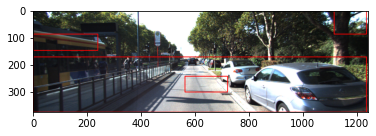

In [128]:
# detected = nn_detect(np.asarray(PIL.Image.open("/content/TT100-Images/mydata/mydata/images/val/10175.jpg")))
# plt.imshow(detected)
detected = nn_detect(np.asarray(PIL.Image.open("/content/Kitti-Images/data_object_image_3/testing/image_3/000050.png")))
plt.imshow(detected)

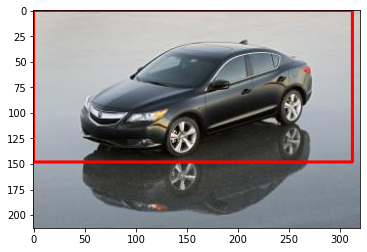

In [129]:
detected = nn_detect(np.asarray(PIL.Image.open("/content/carDataset/Acura_ILX_2015_27_17_150_20_4_70_55_179_24_FWD_5_4_4dr_Dwn.jpg")))
plt.imshow(detected)